<a href="https://colab.research.google.com/github/sjpozzuoli/Daves_Eagles/blob/main/unsupervised_analysis_group_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

# Import the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Import Dataset

In [2]:
data_basic = pd.read_csv('data.csv')

In [3]:
data_basic.head()

,city,state,month,year,supply_score,demand_score,median_listing_price_yy,median_days_on_market_yy,unique_viewers_per_property_yy,mortgage_rate,date,date_month_num,hotness_rank_yy,hotness_rank
0,richmond,va,July,2021,31.832594,56.119214,0.034750,-0.385714,0.279070,2.18,2021-07-01,7,-207,958
1,lafayette,la,July,2021,14.204185,30.691186,-0.155556,-0.595420,0.600000,2.18,2021-07-01,7,80,1343
2,yuma,az,July,2021,85.225111,38.871275,0.169684,-0.542373,0.257143,2.18,2021-07-01,7,272,463
3,faribault,mn,July,2021,35.193405,32.847178,0.110883,0.000000,0.205882,2.18,2021-07-01,7,-785,1151
4,chicago,il,July,2021,82.371592,79.581484,-0.125039,-0.348837,-0.027027,2.18,2021-07-01,7,-116,164


In [4]:
data_basic.shape

(42585, 14)

## Data Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd6eebda8d0>,
      dtype=object)

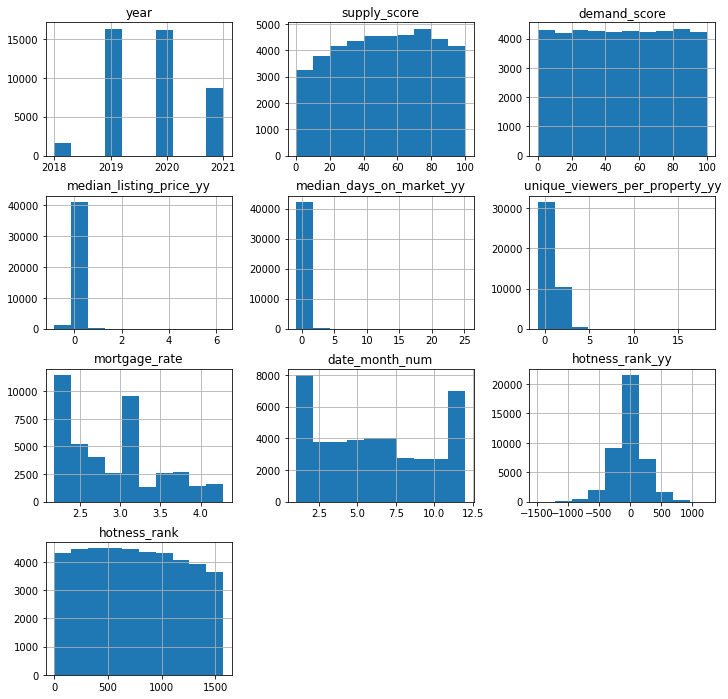

In [5]:
data_basic.hist(figsize=(12,12))

## Identify any outliers

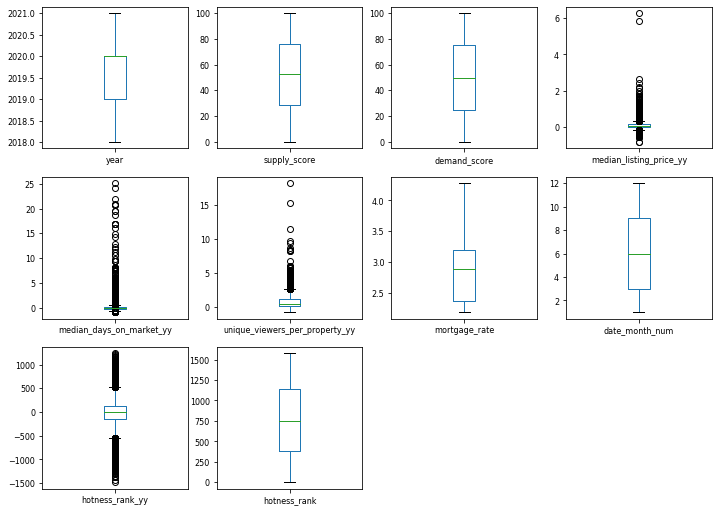

In [6]:
data_basic.plot(kind='box', subplots=True, layout= (4,4), fontsize=8, figsize=(12,12));

## Get Info about the dataset

In [7]:
print(data_basic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42585 entries, 0 to 42584
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   city                            42584 non-null  object 
 1   state                           42584 non-null  object 
 2   month                           42585 non-null  object 
 3   year                            42585 non-null  int64  
 4   supply_score                    42585 non-null  float64
 5   demand_score                    42585 non-null  float64
 6   median_listing_price_yy         42584 non-null  float64
 7   median_days_on_market_yy        42585 non-null  float64
 8   unique_viewers_per_property_yy  42584 non-null  float64
 9   mortgage_rate                   42585 non-null  float64
 10  date                            42585 non-null  object 
 11  date_month_num                  42585 non-null  int64  
 12  hotness_rank_yy                 

## Remove null values

In [8]:
data_basic = data_basic.dropna()
print(data_basic.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42584 entries, 0 to 42583
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   city                            42584 non-null  object 
 1   state                           42584 non-null  object 
 2   month                           42584 non-null  object 
 3   year                            42584 non-null  int64  
 4   supply_score                    42584 non-null  float64
 5   demand_score                    42584 non-null  float64
 6   median_listing_price_yy         42584 non-null  float64
 7   median_days_on_market_yy        42584 non-null  float64
 8   unique_viewers_per_property_yy  42584 non-null  float64
 9   mortgage_rate                   42584 non-null  float64
 10  date                            42584 non-null  object 
 11  date_month_num                  42584 non-null  int64  
 12  hotness_rank_yy                 

## Data Visualization

## Basic Statistics

In [9]:
data_basic.describe().T

,count,mean,std,min,25%,50%,75%,max
year,42584.0,2019.747159,0.817474,2018.000000,2019.000000,2020.000000,2020.000000,2021.000000
supply_score,42584.0,51.923517,27.837833,0.000000,28.662016,52.631579,75.776791,100.000000
demand_score,42584.0,49.993759,28.883054,0.000000,25.110970,49.968294,75.079264,100.000000
median_listing_price_yy,42584.0,0.074040,0.140423,-0.846743,0.000000,0.058285,0.131194,6.291667
median_days_on_market_yy,42584.0,-0.039834,0.575306,-0.905660,-0.226212,-0.075606,0.061538,25.103448
unique_viewers_per_property_yy,42584.0,0.730865,0.777093,-0.772727,0.181818,0.470588,1.153846,18.250000
mortgage_rate,42584.0,2.893544,0.563879,2.180000,2.360000,2.885000,3.200000,4.280000
date_month_num,42584.0,6.198619,3.486933,1.000000,3.000000,6.000000,9.000000,12.000000
hotness_rank_yy,42584.0,-12.062911,254.609427,-1482.000000,-144.000000,-8.000000,121.000000,1233.000000
hotness_rank,42584.0,764.173398,445.342077,1.000000,380.000000,753.000000,1141.000000,1574.000000


## Manual Describe Method

In [10]:
data_basic.describe(include=['object', 'object'])

,city,state,month,date
count,42584,42584,42584,42584
unique,748,51,12,34
top,new york,tx,December,2019-01-01
freq,760,2845,4077,1385


## Sort by Hotness Rank

In [11]:
data_basic.sort_values(by='hotness_rank', ascending=True).head()

,city,state,month,year,supply_score,demand_score,median_listing_price_yy,median_days_on_market_yy,unique_viewers_per_property_yy,mortgage_rate,date,date_month_num,hotness_rank_yy,hotness_rank
1666,mount vernon,oh,June,2021,99.556119,99.239062,0.042101,-0.844037,0.606383,2.27,2021-06-01,6,94,1
18440,columbus,oh,May,2020,96.195308,99.936588,0.118865,-0.115789,1.293103,2.69,2020-05-01,5,125,1
39843,new orleans,la,January,2019,96.575777,99.746354,0.126945,-0.190476,0.358974,3.91,2019-01-01,1,54,1
31507,columbus,oh,August,2019,98.541535,98.985415,-0.029326,-0.195402,0.257143,3.08,2019-08-01,8,13,1
408,columbus,oh,July,2021,99.175650,99.175650,0.330860,-0.819355,-0.366337,2.18,2021-07-01,7,459,1


## Create dataframe for ML model
### Use supply_score and demand_score

In [12]:
X = data_basic.iloc[:, [4, 5]].values

In [13]:
print(X)

[[31.83259353 56.1192137 ]
 [14.20418516 30.6911858 ]
 [85.22511097 38.87127457]
 ...
 [56.24603678 68.80152188]
 [99.42929613 30.31071655]
 [58.14838301 50.03170577]]


# Use Elbow Method to find the optimal number of clusters

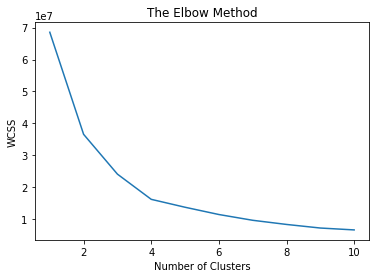

In [14]:
# Implement Elbow Method 
# Run the K-Means algo several times with a seperate number of clusters
from sklearn.cluster import KMeans

# For loop with K-Means for 10 different number of clusters (1-10)
wcss = []

for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

## Train K-Means Model on the dataset

In [15]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [16]:
print(y_kmeans)

[2 1 3 ... 2 3 3]


## Visualize the Clusters

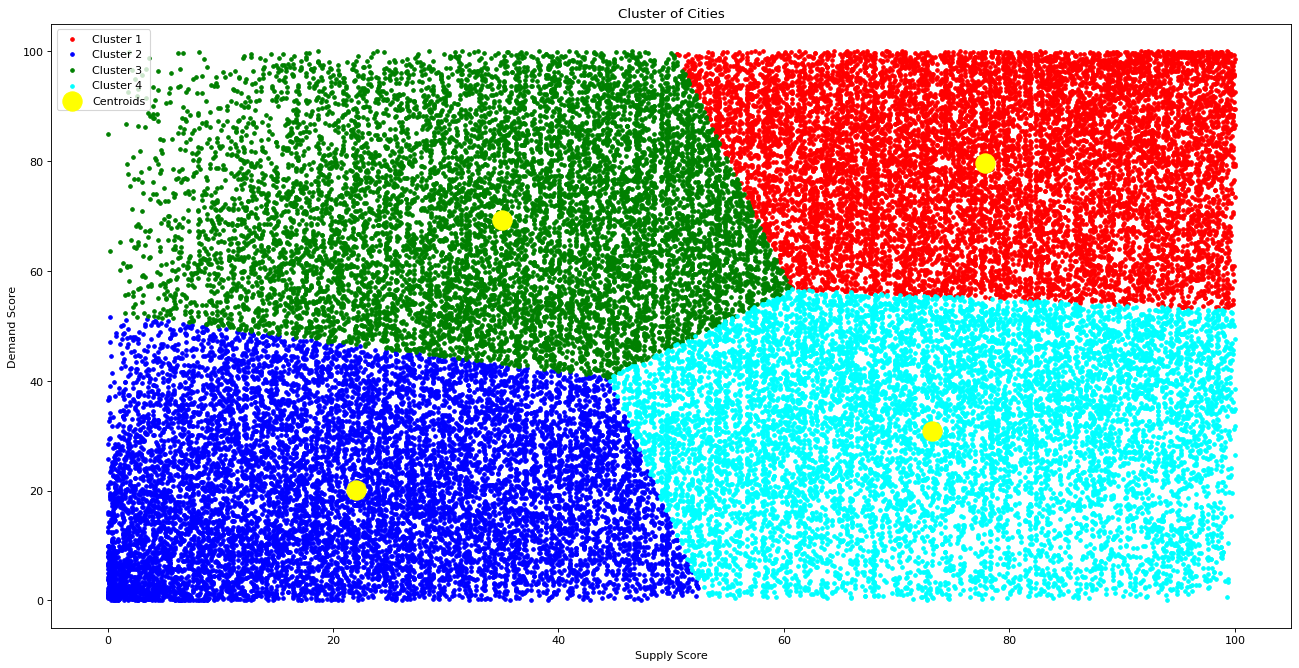

In [17]:
from matplotlib.pyplot import figure
figure(figsize=(20, 10), dpi=80)

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 10, c = 'cyan', label = 'Cluster 4')

# plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

plt.title('Cluster of Cities')
plt.xlabel('Supply Score')
plt.ylabel('Demand Score')
plt.legend()
plt.show()

## Add "class" column to dataset with new clusters

In [18]:
data_basic["class"] = kmeans.labels_

In [19]:
data_basic.head()

,city,state,month,year,supply_score,demand_score,median_listing_price_yy,median_days_on_market_yy,unique_viewers_per_property_yy,mortgage_rate,date,date_month_num,hotness_rank_yy,hotness_rank,class
0,richmond,va,July,2021,31.832594,56.119214,0.034750,-0.385714,0.279070,2.18,2021-07-01,7,-207,958,2
1,lafayette,la,July,2021,14.204185,30.691186,-0.155556,-0.595420,0.600000,2.18,2021-07-01,7,80,1343,1
2,yuma,az,July,2021,85.225111,38.871275,0.169684,-0.542373,0.257143,2.18,2021-07-01,7,272,463,3
3,faribault,mn,July,2021,35.193405,32.847178,0.110883,0.000000,0.205882,2.18,2021-07-01,7,-785,1151,1
4,chicago,il,July,2021,82.371592,79.581484,-0.125039,-0.348837,-0.027027,2.18,2021-07-01,7,-116,164,0


## Create copy of data_basic called dataset_clusters

In [20]:
data_clusters = data_basic.copy()

In [21]:
data_clusters.shape

(42584, 15)

In [22]:
data_clusters.keys()

Index(['city', 'state', 'month', 'year', 'supply_score', 'demand_score',
       'median_listing_price_yy', 'median_days_on_market_yy',
       'unique_viewers_per_property_yy', 'mortgage_rate', 'date',
       'date_month_num', 'hotness_rank_yy', 'hotness_rank', 'class'],
      dtype='object')

## Check for null values

In [23]:
data_clusters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42584 entries, 0 to 42583
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   city                            42584 non-null  object 
 1   state                           42584 non-null  object 
 2   month                           42584 non-null  object 
 3   year                            42584 non-null  int64  
 4   supply_score                    42584 non-null  float64
 5   demand_score                    42584 non-null  float64
 6   median_listing_price_yy         42584 non-null  float64
 7   median_days_on_market_yy        42584 non-null  float64
 8   unique_viewers_per_property_yy  42584 non-null  float64
 9   mortgage_rate                   42584 non-null  float64
 10  date                            42584 non-null  object 
 11  date_month_num                  42584 non-null  int64  
 12  hotness_rank_yy                 

## Summary statistics transposed

In [24]:
data_clusters.describe().T

,count,mean,std,min,25%,50%,75%,max
year,42584.0,2019.747159,0.817474,2018.000000,2019.000000,2020.000000,2020.000000,2021.000000
supply_score,42584.0,51.923517,27.837833,0.000000,28.662016,52.631579,75.776791,100.000000
demand_score,42584.0,49.993759,28.883054,0.000000,25.110970,49.968294,75.079264,100.000000
median_listing_price_yy,42584.0,0.074040,0.140423,-0.846743,0.000000,0.058285,0.131194,6.291667
median_days_on_market_yy,42584.0,-0.039834,0.575306,-0.905660,-0.226212,-0.075606,0.061538,25.103448
unique_viewers_per_property_yy,42584.0,0.730865,0.777093,-0.772727,0.181818,0.470588,1.153846,18.250000
mortgage_rate,42584.0,2.893544,0.563879,2.180000,2.360000,2.885000,3.200000,4.280000
date_month_num,42584.0,6.198619,3.486933,1.000000,3.000000,6.000000,9.000000,12.000000
hotness_rank_yy,42584.0,-12.062911,254.609427,-1482.000000,-144.000000,-8.000000,121.000000,1233.000000
hotness_rank,42584.0,764.173398,445.342077,1.000000,380.000000,753.000000,1141.000000,1574.000000


In [25]:
data_clusters.dtypes

city                               object
state                              object
month                              object
year                                int64
supply_score                      float64
demand_score                      float64
median_listing_price_yy           float64
median_days_on_market_yy          float64
unique_viewers_per_property_yy    float64
mortgage_rate                     float64
date                               object
date_month_num                      int64
hotness_rank_yy                     int64
hotness_rank                        int64
class                               int32
dtype: object

In [26]:
# remove "year" column
data_corr = data_clusters.drop(columns=["year"])
data_corr.head()

,city,state,month,supply_score,demand_score,median_listing_price_yy,median_days_on_market_yy,unique_viewers_per_property_yy,mortgage_rate,date,date_month_num,hotness_rank_yy,hotness_rank,class
0,richmond,va,July,31.832594,56.119214,0.034750,-0.385714,0.279070,2.18,2021-07-01,7,-207,958,2
1,lafayette,la,July,14.204185,30.691186,-0.155556,-0.595420,0.600000,2.18,2021-07-01,7,80,1343,1
2,yuma,az,July,85.225111,38.871275,0.169684,-0.542373,0.257143,2.18,2021-07-01,7,272,463,3
3,faribault,mn,July,35.193405,32.847178,0.110883,0.000000,0.205882,2.18,2021-07-01,7,-785,1151,1
4,chicago,il,July,82.371592,79.581484,-0.125039,-0.348837,-0.027027,2.18,2021-07-01,7,-116,164,0


## Correlations between features

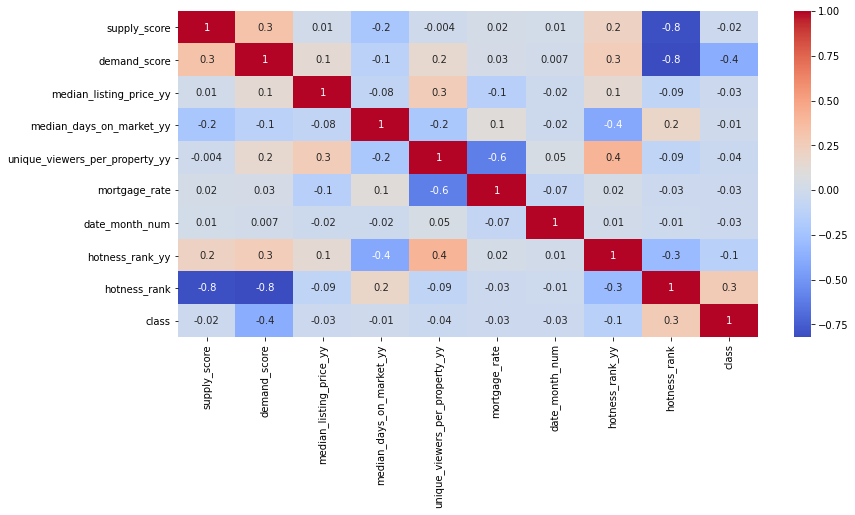

In [27]:
plt.figure(figsize=(13,6))
sns.heatmap(data_corr.corr(), 
            annot=True, 
            fmt='.1g',
            cmap= 'coolwarm')

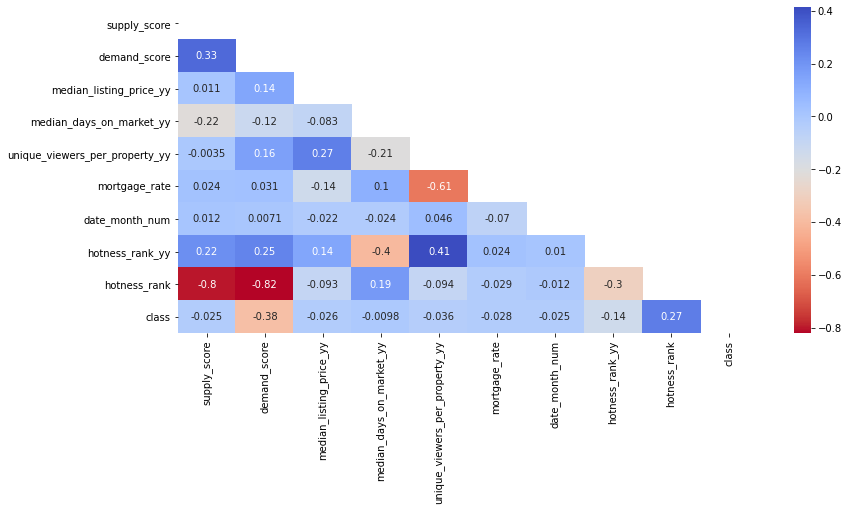

In [28]:
plt.figure(figsize=(13,6))

matrix = np.triu(data_corr.corr())
sns.heatmap(data_corr.corr(), annot=True, mask=matrix, cmap= 'coolwarm_r')

## Unimodal Data Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd6edd8f390>,
      dtype=object)

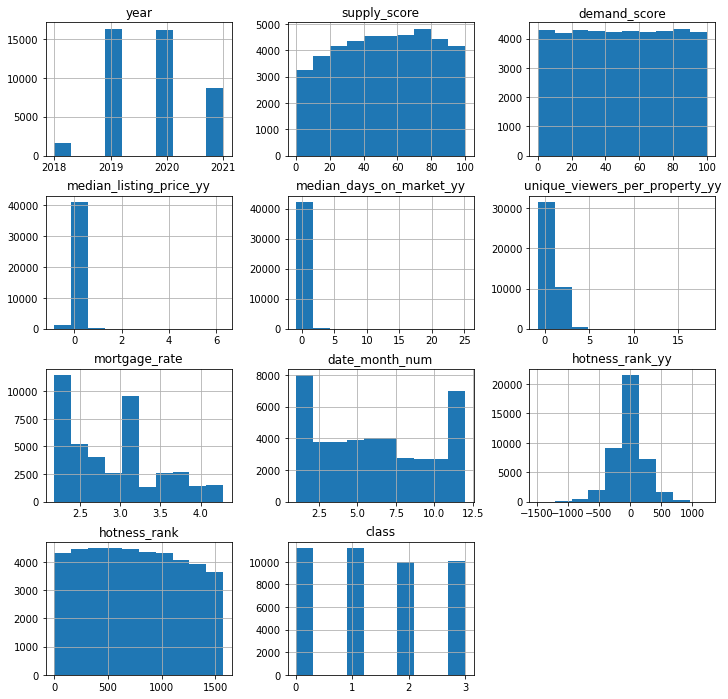

In [29]:
data_clusters.hist(figsize=(12,12))

## Identify the Outliers

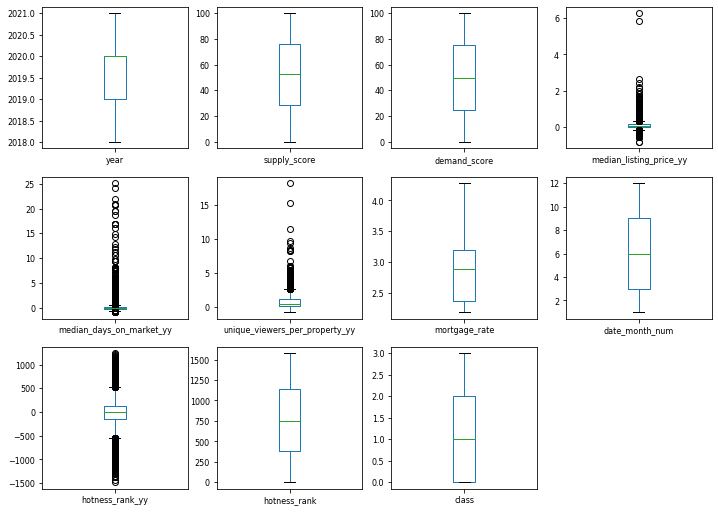

In [30]:
data_clusters.plot(kind='box', subplots=True, layout= (4,4), fontsize=8, figsize=(12,12));

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


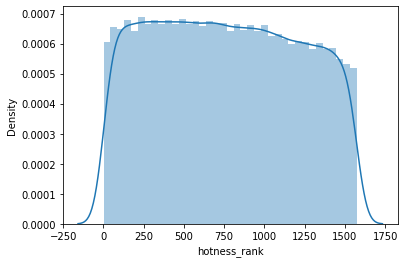

In [31]:
sns.distplot(data_clusters['hotness_rank'])

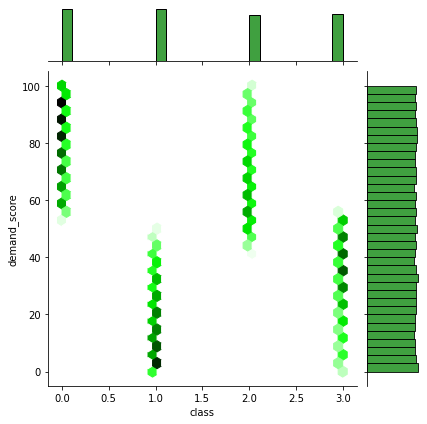

In [32]:
sns.jointplot(x='class', y='demand_score', data=data_clusters, kind='hex', color='g')

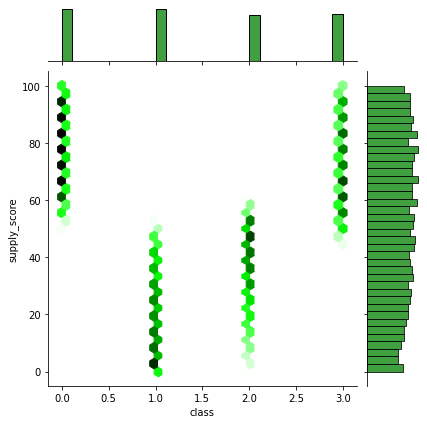

In [33]:
sns.jointplot(x='class', y='supply_score', data=data_clusters, kind='hex', color='g')

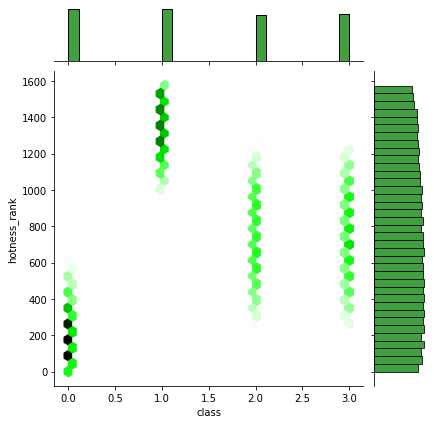

In [34]:
sns.jointplot(x='class', y='hotness_rank', data=data_clusters, kind='hex', color='g')

In [39]:
data_clusters.pivot_table(['supply_score', 'demand_score'], ['class'], aggfunc='mean')

,demand_score,supply_score
class,,
0,79.612212,77.853418
1,20.172622,22.104198
2,69.429142,34.940385
3,30.948529,73.122627


In [41]:
data_clusters.pivot_table(['supply_score', 'demand_score', 'median_listing_price_yy',
                           'median_days_on_market_yy', 
                           'hotness_rank',
                           'unique_viewers_per_property_yy'], ['class'], aggfunc='mean')

,demand_score,hotness_rank,median_days_on_market_yy,median_listing_price_yy,supply_score,unique_viewers_per_property_yy
class,,,,,,
0,79.612212,217.844084,-0.134798,0.086165,77.853418,0.797534
1,20.172622,1332.001158,0.111149,0.053853,22.104198,0.630859
2,69.429142,750.417473,-0.032334,0.095906,34.940385,0.864002
3,30.948529,753.547515,-0.109625,0.061309,73.122627,0.635824
